# IMPORTING THE NECESSARY LIBRARIES

In [52]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# IMPORTING DATA SET

In [53]:
import math
np.random.seed(42)
def PointInCircum(r,n=100):
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [54]:
#Creating data points in the form of a circle
df=pd.DataFrame(PointInCircum(500,1000))
df=df.append(PointInCircum(300,700))
df=df.append(PointInCircum(100,300))

# adding noise to dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


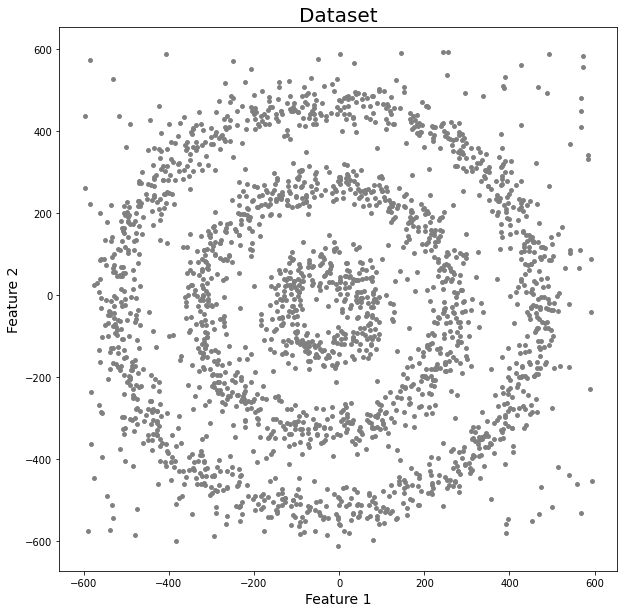

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20);plt.xlabel('Feature 1',fontsize=14);plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means Clustering

In [56]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

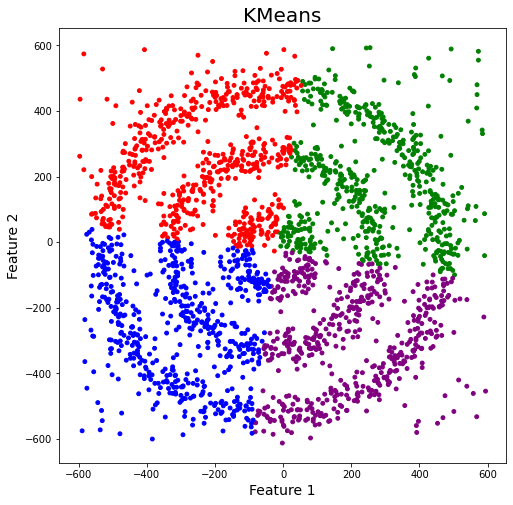

In [57]:
df['KMeans_labels'] = k_means.labels_
colors=['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('KMeans',fontsize=20);plt.xlabel('Feature 1',fontsize=14);plt.ylabel('Feature 2',fontsize=14)
plt.show()

# HIERARCHICAL CLUSTERING

In [58]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

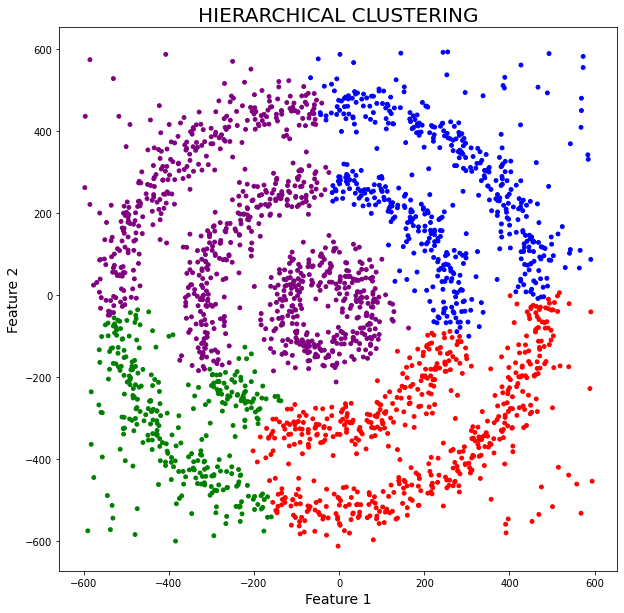

In [59]:
df['HR_labels'] =model.labels_
#colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('HIERARCHICAL CLUSTERING',fontsize=20);plt.xlabel('Feature 1',fontsize=14);plt.ylabel('Feature 2',fontsize=14)
plt.show()

# DBSCAN CLUSTERING

In [60]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

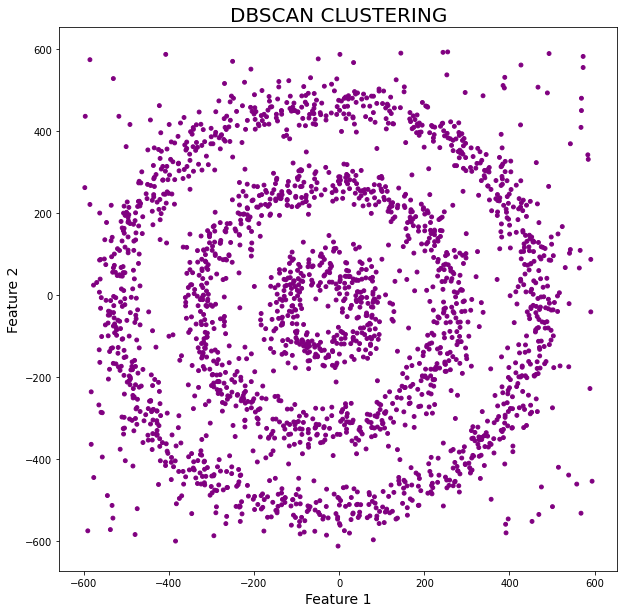

In [61]:
df['DBSCAN_labels'] =dbscan.labels_
#colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN CLUSTERING',fontsize=20);plt.xlabel('Feature 1',fontsize=14);plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [62]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, np.indices = nbrs.kneighbors(df[[0,1]])
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

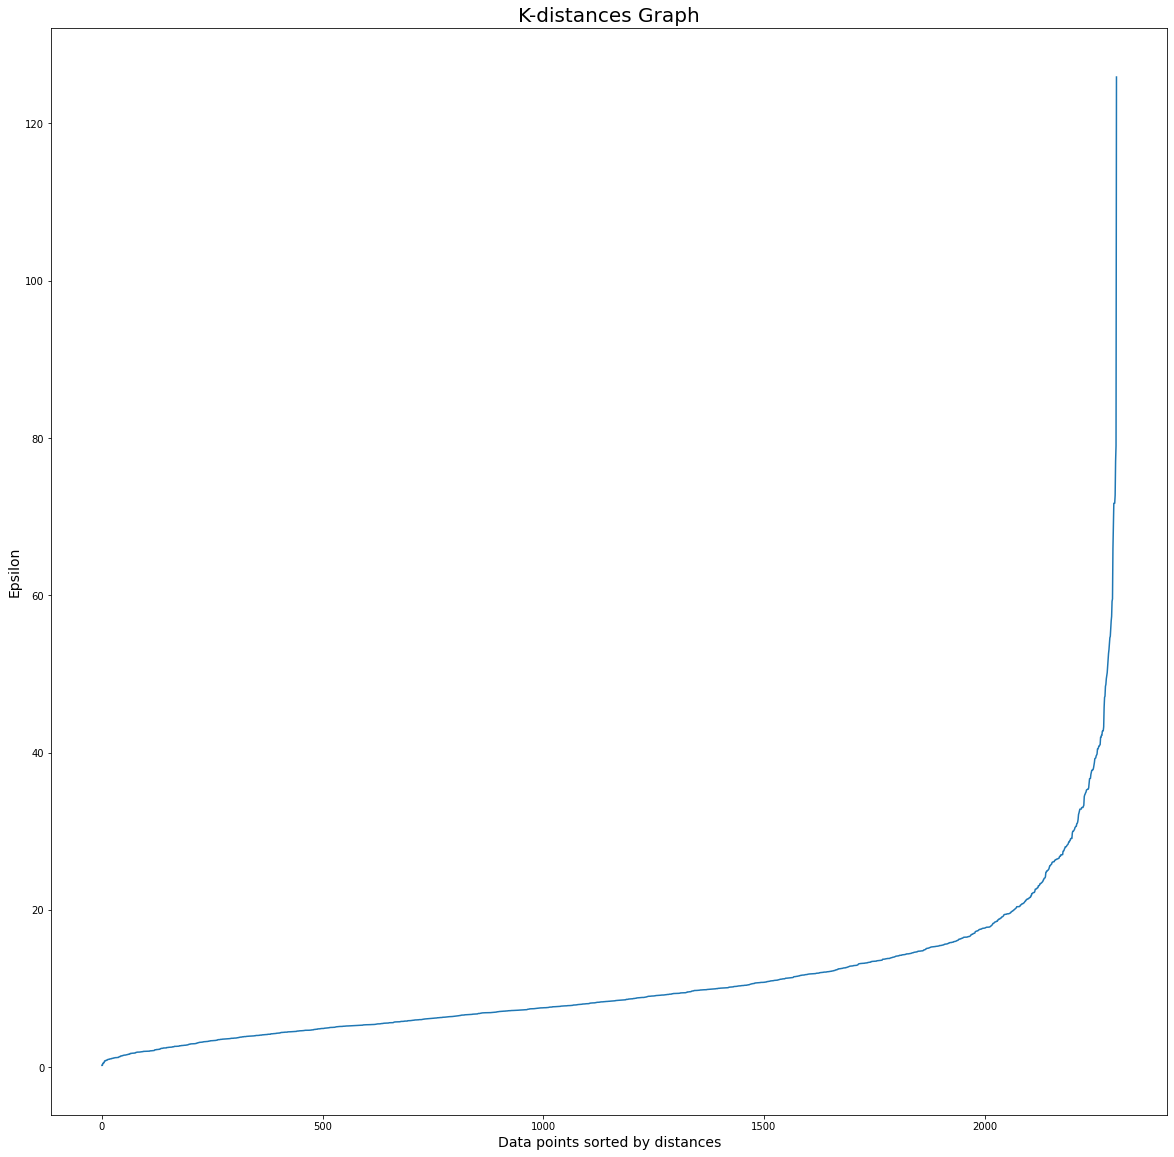

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[: , 1]
#colors=['purple','red','blue','green']
plt.figure(figsize=(20,20))
plt.plot(distances)
plt.title('K-distances Graph',fontsize=20);plt.xlabel('Data points sorted by distances',fontsize=14);plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [64]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [66]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

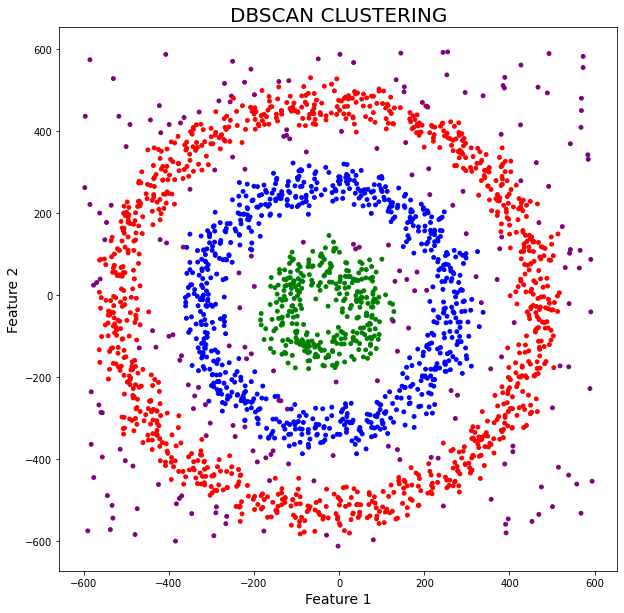

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN CLUSTERING',fontsize=20);plt.xlabel('Feature 1',fontsize=14);plt.ylabel('Feature 2',fontsize=14)
plt.show()